___
# Ciência dos Dados - PROJETO 2

___
## Nome 1 João Pedro Montefeltro Junqueira Meirelles

## Nome 2 Ester dos Santos Quintino

___

___

## 1. Problema

O Classificador Naive-Bayes, o qual se baseia no uso do teorema de Bayes, é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser SPAM considerando as palavras em seu conteúdo e, de forma complementar, permite calcular a probabilidade de uma mensagem ser HAM dada as palavras descritas na mensagem.

Para realizar o MVP (minimum viable product) do projeto, você precisa programar uma versão do classificador que "aprende" o que é uma mensagem SPAM considerando uma base de treinamento e comparar o desempenho dos resultados com uma base de testes. 


___
## 2. Separação da base de dados em Treinamento e Teste

A base de dados deve ser separada em duas partes, aleatoriamente, considerando: 
    
    75% dos dados para a parte Treinamento; e
    25% dos dados para a parte Teste.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as jeca
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\furyo\Desktop\CDDP-P2


# Lendo a base de dados

In [3]:
dados = pd.read_excel('spamham.xlsx')
dados = dados.iloc[np.random.permutation(len(dados))]

In [4]:
num = len(dados.Email)
setenta_cinco = int(num*0.75)

___
## 3. Classificador Naive-Bayes

# Limpeza das mensagens e remoção dos caracteres que não afetam a classificação

In [5]:
arranca = [':',',','"','/',';','.','=','+','(',')','*','@','#','$','%']
for i in range(num):
    dados.Email[i:i+1] = dados.Email[i:i+1].str.replace('  ',' ') # Mudança de 2 espaços para 1
    for j in arranca:
        dados.Email[i:i+1] = dados.Email[i:i+1].str.replace(j,'') 

dados.Email

2637                              Am in gobi arts college
5469                                               Ok lor
1014                   Ya toldshe was asking wats matter?
2711    Hey you still want to go for yogasana? Coz if ...
4368                                          Anytime lor
4712    Big brother‰Û÷s really scraped the barrel with...
3715               Networking technical support associate
588                           Ya srsly better than yi tho
2530    What's happening with you Have you gotten a jo...
2       Free entry in 2 a wkly comp to win FA Cup fina...
354              &lt&gt ISH MINUTES WAS 5 MINUTES AGO WTF
3365                       I am waiting for your call sir
2655                     Feel like trying kadeem again? V
1050            Are you available for soiree on June 3rd?
3810          Excellent! Wish we were together right now!
4408    For your chance to WIN a FREE Bluetooth Headse...
60      Your gonna have to pick up a 1 burger for your...
5086    Omg if

# Separação da base de dados em Treinamento e Teste na fração 3 para 1.

In [6]:
#75% dos dados para a parte Treinamento.
#25% dos dados para a parte Teste.

dados_treino = dados.iloc[:setenta_cinco]
dados_teste = dados.iloc[setenta_cinco:num]
dados_reais = dados.iloc[setenta_cinco:num]


# Probabilidade de  uma mensagem ser SPAM e Probabilidade de uma mensagem ser HAM

In [7]:
dados_teste = dados_teste.Email.values #Values retorna uma lista com os emails.

Spam = dados_treino.Email[dados_treino.Class == 'spam'].values
Ham = dados_treino.Email[dados_treino.Class == 'ham'].values

# Probabilidade de uma mensagem ser SPAM:

Pspam = (dados_treino.Email[dados_treino.Class == 'spam'].count()/dados_treino.Email.count())


# Probabilidade de uma mensagem ser HAM:

Pham = (dados_treino.Email[dados_treino.Class == 'ham'].count()/dados_treino.Email.count())

# Criação de uma lista que armazena as palavras do email

In [8]:
#SPAM
spam_words = []
ham_words = []
i = 0
while i < len(Spam):
    word = Spam[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            spam_words.append(j)
    i+=1

In [9]:
#HAM
i = 0
while i < len(Ham):
    word = Ham[i].split()
    for j in word:
        if j.isdigit == True:
            pass
        if len(j) <= 3:
            pass
        else:
            ham_words.append(j)
    i+=1

# Criação de um dicionário 

In [10]:
spam_dic = {}
for i in spam_words:
    if i in spam_dic:
        continue
    else:   
        n = spam_words.count(i)
        spam_dic[i] = (n + 1)/(len(spam_words) + (len(spam_words)+len(ham_words)))
ham_dic = {}
for i in ham_words:
    if i in ham_dic:
        continue
    else:   
        n = ham_words.count(i)
        ham_dic[i] = (n + 1)/(len(ham_words) + (len(spam_words)+len(ham_words)))

# CLassificação

In [11]:
def classificando(emails,spam,ham,Pspam,Pham,roc):
    classificados = {} #Devolve se o email é SPAM ou se o email é HAM
    for emailss in emails:
        pspam = (Pspam + 1)/(len(spam) + (len(spam)+len(ham)))
        pham = (Pham + 1)/(len(spam) + (len(spam)+len(ham)))
        email = str(emailss).split()
        
        for w in email: #probabilidade de uma palavra acontecer se a mensagem na base treinamento é considerada SPAM e HAM.
            if w in spam:
                pspam = pspam * spam[w]
            if w in ham:
                pham = pham * ham[w]
            if w not in spam or w not in ham:
                pspam = pspam * (1/(len(spam)+len(ham)))
                pham = pham * (1/(len(spam)+len(ham))) 
        if pspam > roc*(pspam + pham):
            classificados[emailss] = 'spam'
        else:
            classificados[emailss] = 'ham'
    return classificados

In [12]:
# Reestruturação dos dados teste
teste = []
for i in dados_teste:
    teste.append(i)
dados_teste = teste

In [13]:
#Guardando classificados e probabilidades em variáveis
roc = 0.5
tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
tudo_certo

{"No shit but I wasn't that surprised so I went and spent the evening with that french guy I met in town here and we fooled around a bit but I didn't let him fuck me": 'spam',
 'Hello No news on job they are making me wait a fifth week! Yeah im up for some woozles and weasels In exeter still but be home about 3 ': 'spam',
 'I cant pick the phone right now Pls send a message': 'spam',
 "Alex says he's not ok with you not being ok with it": 'spam',
 "God's love has no limit God's grace has no measure God's power has no boundaries May u have God's endless blessings always in ur life!! Gud ni8": 'spam',
 'Cos darren say Ì_ considering mah so i ask Ì_': 'spam',
 "Yup it's at paragon I havent decided whether 2 cut yet Hee": 'spam',
 'Hows the pain dear?y r u smiling?': 'spam',
 'K still are you loving me': 'spam',
 'Kkyesterday i was in cbe ': 'ham',
 'And pls pls drink plenty plenty water': 'spam',
 'Just sleepingand surfing': 'spam',
 "Don know I did't msg him recently": 'spam',
 "Science 

In [14]:
# Lista com apenas spam's e ham's
results = []
for i in dados_teste:
    results.append(tudo_certo[i])

In [15]:
df_meus = pd.DataFrame({
    'Class' : results,
    'Emails' : dados_teste
})

In [16]:
valores_reais = dados_reais.Class.values

In [17]:
df_comp = pd.DataFrame({
    'Minhas' : results,
    'Reais' : valores_reais
})

In [18]:
# % de acertos
spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

In [19]:
print(pd.crosstab(df_comp.Reais,df_comp.Minhas))

Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


## 4. Curva ROC

In [20]:
def reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc):
    tudo_certo = classificando(dados_teste,spam_dic,ham_dic,Pspam,Pham,roc)
    results = []
    for i in dados_teste:
        results.append(tudo_certo[i])
    df_meus = pd.DataFrame({
        'Class' : results,
        'Emails' : dados_teste
    })
    valores_reais = dados_reais.Class.values
    df_comp = pd.DataFrame({
        'Minhas' : results,
        'Reais' : valores_reais
    })
    spam_spam = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'spam')].count()
    spam_ham = df_comp.Minhas[(df_comp.Minhas == 'spam') & (df_comp.Reais == 'ham')].count()
    ham_ham = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'ham')].count()
    ham_spam = df_comp.Minhas[(df_comp.Minhas == 'ham') & (df_comp.Reais == 'spam')].count()

    return df_comp, spam_spam, spam_ham, ham_ham, ham_spam


In [21]:
r = np.arange(0.5,1,0.001)
sensibilidade = []
especificidade = []
lista_SV = []
lista_SF = []
lista_HV = []
lista_HF = []

for roca in r:
    df_comp, spam_spam, spam_ham, ham_ham, ham_spam = reclass(dados_teste,spam_dic,ham_dic,Pspam,Pham,roca)
    
    curva_intel_verdadeiro = spam_spam/(spam_spam + spam_ham)
    curva_intel_falso = ham_ham/(ham_ham + ham_spam)
    
    sensibilidade.append(curva_intel_verdadeiro)
    especificidade.append(1 - curva_intel_falso)
    
    lista_SV.append(spam_spam)
    lista_SF.append(spam_ham)
    lista_HV.append(ham_ham)
    lista_HF.append(ham_spam)
    print(pd.crosstab(df_comp.Reais,df_comp.Minhas))
    print('\n')

Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ham     171  1035
spam    160    27


Minhas  ham  spam
Reais            
ha

spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam
Reais            
ham     174  1032
spam    160    27


Minhas  ham  spam


spam    162    25


Minhas  ham  spam
Reais            
ham     180  1026
spam    162    25


Minhas  ham  spam
Reais            
ham     180  1026
spam    162    25


Minhas  ham  spam
Reais            
ham     180  1026
spam    162    25


Minhas  ham  spam
Reais            
ham     181  1025
spam    162    25


Minhas  ham  spam
Reais            
ham     181  1025
spam    162    25


Minhas  ham  spam
Reais            
ham     181  1025
spam    162    25


Minhas  ham  spam
Reais            
ham     181  1025
spam    162    25


Minhas  ham  spam
Reais            
ham     181  1025
spam    162    25


Minhas  ham  spam
Reais            
ham     182  1024
spam    162    25


Minhas  ham  spam
Reais            
ham     182  1024
spam    162    25


Minhas  ham  spam
Reais            
ham     182  1024
spam    162    25


Minhas  ham  spam
Reais            
ham     182  1024
spam    162    25


Minhas  ham  spam
Reais            
ham     182  1024
spam    162    25


Minhas  ham  spam


spam    162    25


Minhas  ham  spam
Reais            
ham     192  1014
spam    162    25


Minhas  ham  spam
Reais            
ham     192  1014
spam    162    25


Minhas  ham  spam
Reais            
ham     193  1013
spam    162    25


Minhas  ham  spam
Reais            
ham     193  1013
spam    162    25


Minhas  ham  spam
Reais            
ham     193  1013
spam    162    25


Minhas  ham  spam
Reais            
ham     193  1013
spam    162    25


Minhas  ham  spam
Reais            
ham     193  1013
spam    162    25


Minhas  ham  spam
Reais            
ham     193  1013
spam    163    24


Minhas  ham  spam
Reais            
ham     193  1013
spam    163    24


Minhas  ham  spam
Reais            
ham     193  1013
spam    163    24


Minhas  ham  spam
Reais            
ham     193  1013
spam    163    24


Minhas  ham  spam
Reais            
ham     194  1012
spam    163    24


Minhas  ham  spam
Reais            
ham     194  1012
spam    163    24


Minhas  ham  spam



Minhas  ham  spam
Reais            
ham     211   995
spam    163    24


Minhas  ham  spam
Reais            
ham     212   994
spam    163    24


Minhas  ham  spam
Reais            
ham     214   992
spam    163    24


Minhas  ham  spam
Reais            
ham     214   992
spam    163    24


Minhas  ham  spam
Reais            
ham     214   992
spam    163    24


Minhas  ham  spam
Reais            
ham     216   990
spam    164    23


Minhas  ham  spam
Reais            
ham     217   989
spam    164    23


Minhas  ham  spam
Reais            
ham     217   989
spam    164    23


Minhas  ham  spam
Reais            
ham     217   989
spam    164    23


Minhas  ham  spam
Reais            
ham     218   988
spam    164    23


Minhas  ham  spam
Reais            
ham     219   987
spam    164    23


Minhas  ham  spam
Reais            
ham     219   987
spam    164    23


Minhas  ham  spam
Reais            
ham     219   987
spam    164    23


Minhas  ham  spam
Reais            
h

In [23]:
sensibilidade = sorted(sensibilidade)
especificidade = sorted(especificidade)

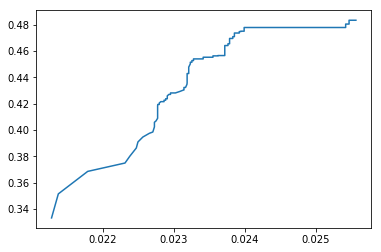

In [24]:
jeca.plot(sensibilidade,especificidade)
jeca.show()

___
## 5. Qualidade do Classificador alterando a base de treinamento